In [9]:
import pybedtools
import matplotlib.pyplot as plt
import matplotlib_venn as vplt

In [10]:
def ven_subplot(title, sets, labels):
    plt.title(title)
    v = vplt.venn2(subsets=sets, set_labels=labels, set_colors=('w', 'w'))
    v.get_label_by_id('10').set_x(0.25)
    v.get_label_by_id('01').set_x(-.25)
    v.get_label_by_id('11').set_x(0)
    v.set_labels[0].set_position((-0.22, -0.45))
    v.set_labels[1].set_position((0.25, -0.45))


    c = vplt.venn2_circles(subsets=(2, 2, 1), linestyle='solid')
    c[0].set_radius(0.32)
    c[1].set_radius(0.32)
    c[0].set_lw(2.0)
    c[1].set_lw(2.0)
    c[0].set_color('green')
    c[1].set_color('red')
    c[0].set_alpha(0.5)
    c[1].set_alpha(0.5)
    c[0].set_edgecolor('black')
    c[1].set_edgecolor('black')

In [105]:
def plot3(new_features_file, catalog_features_file, validated_features_file, und_wo=True, und_v=False):
    new_features = pybedtools.BedTool(new_features_file)
    catalog_features = pybedtools.BedTool(catalog_features_file)
    validated_features = pybedtools.BedTool(validated_features_file)

    new_vs_validated = validated_features.intersect(new_features, wo=und_wo, v=und_v)
    catalog_vs_validated = validated_features.intersect(catalog_features, wo=und_wo, v=und_v)
    new_vs_catalog = catalog_features.intersect(new_features, wo=True, v=False)

    print("new: " + str(new_features.count()) + " validated: "+ str(validated_features.count()) + " catalog:" + str(catalog_features.count()))

    plt.figure(figsize=(15,10))
    plt.subplot(2, 2, 1)
    
    atotal=validated_features.count()
    btotal=new_features.count()
    ab=new_vs_validated.count() if not und_v else atotal - new_vs_validated.count()
    a=atotal-ab
    b=btotal-ab
    ven_subplot('New Features Vs. Validated Features', (a,b,ab), ('New Calls (' + str(btotal) +')', 'Validated ('+ str(atotal) +')'))

    plt.subplot(2, 2, 2)
    
    atotal=validated_features.count()
    btotal=catalog_features.count()
    ab=catalog_vs_validated.count() if not und_v else atotal - catalog_vs_validated.count()
    a=atotal-ab
    b=btotal-ab
    ven_subplot('Catalog Vs. Validated Features', (a,b,ab), ('Catalog (' + str(btotal) +')', 'Validated ('+ str(atotal) +')'))

    plt.subplot(2, 1, 2)
    
    atotal=catalog_features.count()
    btotal=new_features.count()
    ab=new_vs_catalog.count()
    a=atotal-ab
    b=btotal-ab
    ven_subplot('New Features Vs. Catalog', (a,b,ab), ('New Calls (' + str(btotal) +')', 'Catalog ('+ str(atotal) +')'))

    return new_vs_validated, catalog_vs_validated, new_vs_catalog

In [106]:
minimap2_sniffles_ins = '../../data/DBA2J/bed/50/minimap2-sniffles/DBA2J_INS.bed'
minimap2_sniffles_del = '../../data/DBA2J/bed/50/minimap2-sniffles/DBA2J_DEL.bed'

minimap2_pbsv_ins = '../../data/DBA2J/bed/50/minimap2-pbsv/DBA2J_INS.bed'
minimap2_pbsv_del = '../../data/DBA2J/bed/50/minimap2-pbsv/DBA2J_DEL.bed'

catalog_ins = '../../data/previous-catalog/50/DBA2J/catalog/remapped_DBA2J_INS.bed'
catalog_del = '../../data/previous-catalog/50/DBA2J/catalog/remapped_DBA2J_DEL.bed'

validated_ins = '../../data/DBA2J/validated/remapped_DBA_2J.H6.mm9.bed'
validated_del = '../../data/DBA2J/validated/remapped_DBA_2J.H1.mm9.bed'

# Minimap2 + Sniffles

## Insertions:

new: 26533 validated: 28 catalog:9406

Output data intersect -v:
Validated vs New (INS)======>:
chr4	108451404	108451405	100/200
chr6	145486712	145486713	500
chr7	98646351	98646352	1000/1500
chr7	98768784	98768785	550
chr7	138829604	138829605	25
chr8	73207739	73207740	1000
chr12	109926718	109926719	50
chr13	108682428	108682429	25

Validated vs Previous (INS)======>:
chr3	149017827	149017828	100
chr4	108451404	108451405	100/200
chr6	145486712	145486713	500
chr7	98768784	98768785	550
chr7	138829604	138829605	25
chr8	73207739	73207740	1000
chr8	109550435	109550436	150
chr9	41311250	41311251	50
chr12	109926718	109926719	50
chr13	108682428	108682429	25
chr19	38036363	38036364	178



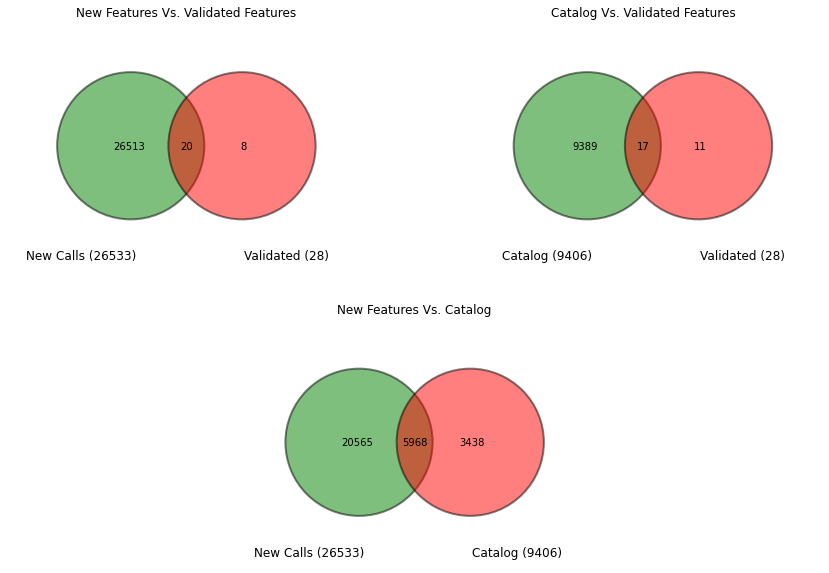

In [115]:
new_vs_validated, catalog_vs_validated, new_vs_catalog = plot3(minimap2_sniffles_ins, catalog_ins, validated_ins, True, True)

print("\nOutput data intersect -v:")
print("Validated vs New (INS)======>:\n" + str(new_vs_validated))

print("Validated vs Previous (INS)======>:\n" + str(catalog_vs_validated))

## Deletions

new: 25958 validated: 81 catalog:17540

Output data intersect -v:
Validated vs New (INS)======>:
chr1	8297250	8299011	1762
chr2	123201215	123201492	278
chr2	162318230	162318300	71
chr5	101021103	101021194	92
chr4	118459742	118462287	2546
chr9	105647016	105647691	676
chr10	18243681	18248375	4695
chr10	106817192	106817301	110
chr11	27327671	27328146	476
chr12	26363795	26363855	61
chr13	116290261	116290750	490
chr13	116290278	116290730	453
chr19	10331721	10331765	45
chr19	10349113	10349142	30
chr19	10726054	10726091	38
chr19	11928896	11928988	93

Validated vs Previous (INS)======>:
chr2	162318230	162318300	71
chr5	101021103	101021194	92
chr4	114022094	114023640	1547
chr8	30958463	30958545	83
chr8	30958463	30958545	83
chr10	82421207	82423382	2176
chr12	26363795	26363855	61
chr12	26405593	26405656	64
chr19	10331721	10331765	45
chr19	10349113	10349142	30
chr19	10726054	10726091	38
chr19	11928896	11928988	93



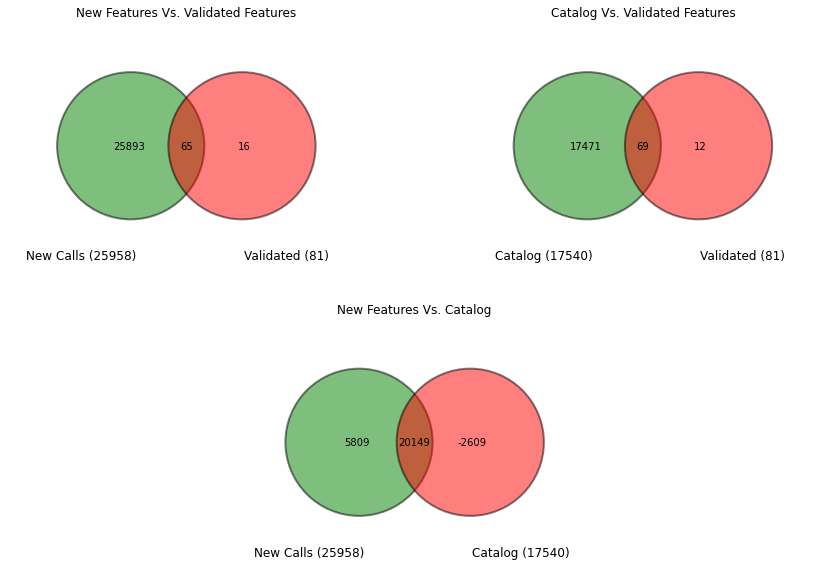

In [117]:
new_vs_validated, catalog_vs_validated, new_vs_catalog = plot3(minimap2_sniffles_del, catalog_del, validated_del, True, True)

print("\nOutput data intersect -v:")
print("Validated vs New (INS)======>:\n" + str(new_vs_validated))

print("Validated vs Previous (INS)======>:\n" + str(catalog_vs_validated))

# Minimap2 + pbsv


## Insertions:

new: 31896 validated: 28 catalog:9406

Output data intersect -v:
Validated vs New (INS)======>:
chr4	108451404	108451405	100/200
chr6	145486712	145486713	500
chr7	98768784	98768785	550
chr7	138829604	138829605	25
chr8	73207739	73207740	1000
chr12	109926718	109926719	50
chr13	108682428	108682429	25

Validated vs Previous (INS)======>:
chr3	149017827	149017828	100
chr4	108451404	108451405	100/200
chr6	145486712	145486713	500
chr7	98768784	98768785	550
chr7	138829604	138829605	25
chr8	73207739	73207740	1000
chr8	109550435	109550436	150
chr9	41311250	41311251	50
chr12	109926718	109926719	50
chr13	108682428	108682429	25
chr19	38036363	38036364	178



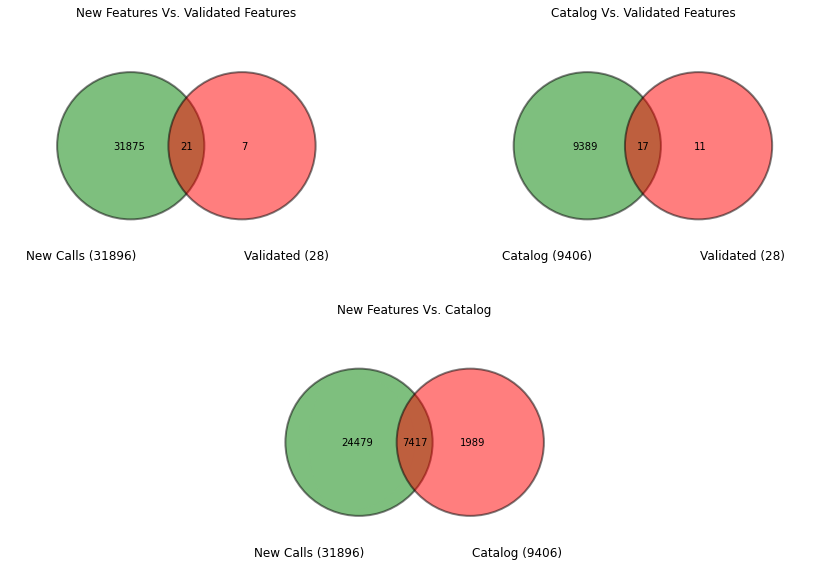

In [118]:
new_vs_validated, catalog_vs_validated, new_vs_catalog = plot3(minimap2_pbsv_ins, catalog_ins, validated_ins, True, True)

print("\nOutput data intersect -v:")
print("Validated vs New (INS)======>:\n" + str(new_vs_validated))

print("Validated vs Previous (INS)======>:\n" + str(catalog_vs_validated))

## Deletions

new: 30401 validated: 81 catalog:17540

Output data intersect -v:
Validated vs New (INS)======>:
chr1	8297250	8299011	1762
chr12	26363795	26363855	61
chr19	10331721	10331765	45
chr19	10349113	10349142	30
chr19	11928896	11928988	93

Validated vs Previous (INS)======>:
chr2	162318230	162318300	71
chr5	101021103	101021194	92
chr4	114022094	114023640	1547
chr8	30958463	30958545	83
chr8	30958463	30958545	83
chr10	82421207	82423382	2176
chr12	26363795	26363855	61
chr12	26405593	26405656	64
chr19	10331721	10331765	45
chr19	10349113	10349142	30
chr19	10726054	10726091	38
chr19	11928896	11928988	93



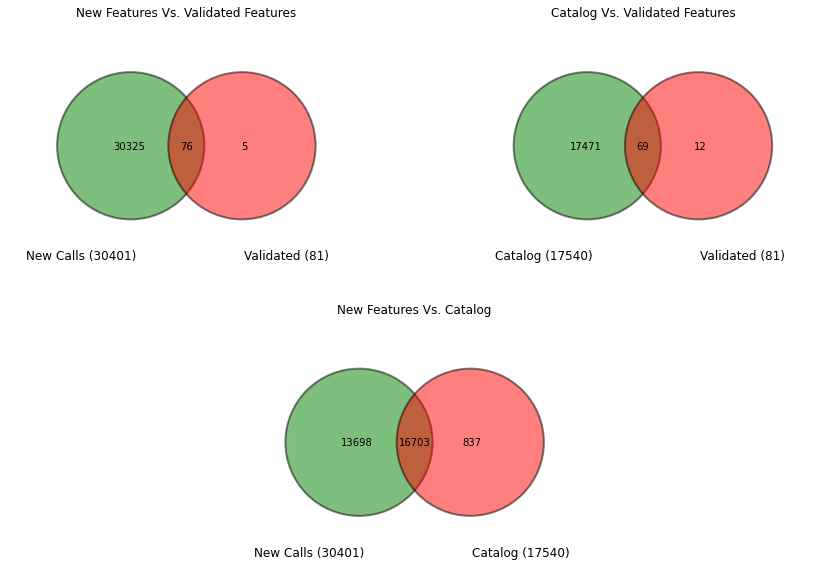

In [119]:
new_vs_validated, catalog_vs_validated, new_vs_catalog = plot3(minimap2_pbsv_del, catalog_del, validated_del, True, True)

print("\nOutput data intersect -v:")
print("Validated vs New (INS)======>:\n" + str(new_vs_validated))

print("Validated vs Previous (INS)======>:\n" + str(catalog_vs_validated))